<a href="https://colab.research.google.com/github/Muhideenthegreat/FDSFE_MMustapha/blob/main/ClassActivities/CopyOf_FDSfE_NLP_demo_Nov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
envs = json.load(open("/content/drive/MyDrive/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [7]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [8]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
ls

sampleSubmission.csv  sentiment-analysis-on-movie-reviews.zip  test.tsv.zip  train.tsv.zip


In [11]:
reviews = pd.read_csv("train.tsv.zip", "\t")
reviews

<ipython-input-11-be135ad2e8c5>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  reviews = pd.read_csv("train.tsv.zip", "\t")


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [12]:
# put the same sentence in the same group - take the full sentence
reviews = reviews.groupby("SentenceId").first()
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [13]:
reviews.shape

(8529, 3)

In [14]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [15]:
counttk = 0
for s in reviews["Phrase"]:
  counttk += len(s.split())
counttk

162044

In [16]:
[len(s.split()) for s in reviews["Phrase"]]

[37,
 11,
 21,
 26,
 7,
 19,
 10,
 20,
 9,
 9,
 22,
 30,
 7,
 27,
 11,
 26,
 11,
 27,
 14,
 11,
 9,
 41,
 19,
 25,
 11,
 16,
 12,
 36,
 16,
 19,
 8,
 22,
 24,
 23,
 20,
 22,
 18,
 19,
 28,
 9,
 24,
 18,
 25,
 12,
 8,
 23,
 15,
 19,
 18,
 26,
 22,
 30,
 25,
 20,
 16,
 6,
 5,
 22,
 26,
 15,
 22,
 21,
 21,
 15,
 17,
 31,
 29,
 6,
 28,
 26,
 17,
 23,
 6,
 11,
 20,
 0,
 18,
 26,
 15,
 12,
 32,
 41,
 15,
 13,
 7,
 22,
 15,
 15,
 19,
 24,
 22,
 16,
 29,
 13,
 22,
 12,
 30,
 19,
 16,
 11,
 30,
 16,
 34,
 6,
 9,
 27,
 20,
 29,
 17,
 24,
 34,
 31,
 42,
 31,
 19,
 10,
 16,
 19,
 25,
 36,
 28,
 2,
 7,
 24,
 29,
 17,
 36,
 38,
 20,
 19,
 10,
 18,
 33,
 17,
 13,
 13,
 5,
 32,
 22,
 4,
 14,
 19,
 16,
 15,
 19,
 20,
 30,
 12,
 42,
 27,
 10,
 40,
 19,
 35,
 5,
 37,
 15,
 6,
 17,
 16,
 14,
 25,
 30,
 16,
 37,
 30,
 22,
 16,
 20,
 19,
 18,
 10,
 27,
 10,
 31,
 21,
 11,
 16,
 25,
 8,
 14,
 27,
 28,
 16,
 14,
 10,
 12,
 7,
 7,
 21,
 17,
 13,
 18,
 17,
 25,
 9,
 23,
 34,
 7,
 14,
 11,
 13,
 11,
 15,
 4,
 19

In [17]:
np.sum([len(s.split()) for s in reviews["Phrase"]])

162044

In [18]:
print('Number of Reviews/Documents: {}'.format(len(reviews["Phrase"])))
#list comprehension
print('Corpus Size (words): {}'.format(np.sum([len(s.split()) for s in reviews["Phrase"]])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [19]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

(array([1072., 2200., 1655., 2321., 1281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <BarContainer object of 5 artists>)

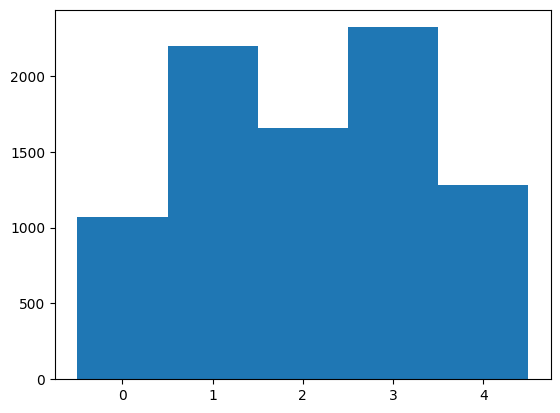

In [20]:
plt.hist(reviews["Sentiment"], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

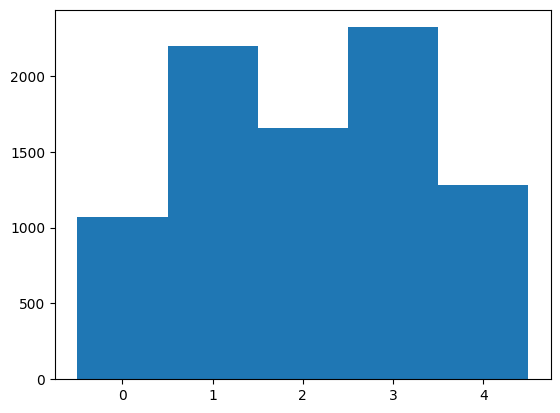

In [21]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"], bins=np.arange(-0.5, 5, 1));

In [22]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=932c9dc968256a07d8fa6b73b92cd629d92780798d1ea3daa050ccfa559e6862
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [23]:
from nltk.tokenize import word_tokenize


In [24]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re
#import string

In [26]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'')

<ipython-input-26-2de8643cad65>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ).str.replace(
<ipython-input-26-2de8643cad65>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  '[^\w\s]', '').str.replace(
<ipython-input-26-2de8643cad65>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  '\r','').str.replace(


In [27]:
reviews.loc[1, "Phrase"]

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story '

In [28]:
word_tokenize(reviews.loc[1, "Phrase"])

['a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story']

# lets talk about the lambda construct and apply method

In [29]:
reviews['Phrase'] = reviews['Phrase'].apply(word_tokenize) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [30]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [31]:
def remst(s):
  return [x for x in s if not x in STOPWORDS]
remst(reviews.loc[1, "Phrase"])

['series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amounts',
 'much',
 'story']

In [32]:
reviews["Phrase"] = reviews["Phrase"].apply(remst) # stop words removal
reviews["Phrase"]

SentenceId
1       [series, escapades, demonstrating, adage, good...
2       [quiet, introspective, entertaining, independe...
3       [even, fans, ismail, merchant, s, work, suspec...
4       [positively, thrilling, combination, ethnograp...
5       [aggressive, selfglorification, manipulative, ...
                              ...                        
8540    [either, re, willing, go, claustrophobic, conc...
8541    [despite, annoyances, capable, clayburgh, tamb...
8542    [lrb, tries, rrb, parody, genre, s, already, j...
8543    [movie, s, downfall, substitute, plot, persona...
8544    [film, darkly, atmospheric, herrmann, quietly,...
Name: Phrase, Length: 8529, dtype: object

# Frequency of words

In [33]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

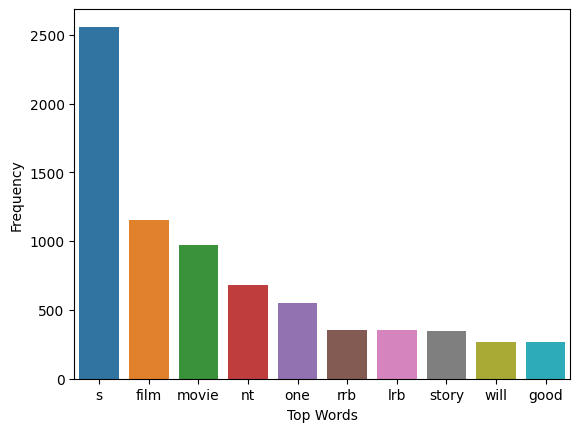

In [34]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10),
                          columns=['Top Words', 'Frequency'])
sns.barplot(x="Top Words",y="Frequency",data=words_freq);


In [35]:
def return_removed(x):
  return [word for word in x if word not in
           ["s", "nt", "rrb", "lrb", "one"]]

In [36]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x :
                  [word for word in x if word not in
                   ["s", "nt", "rrb", "lrb", "one"]]) # more "stop" words
# or I could do it by length: are there gpoing to be key words that are <4 characters??
reviews["Phrase"] = reviews["Phrase"].apply(lambda x :
                  [word for word in x if len(word)>3]) # more "stop" words


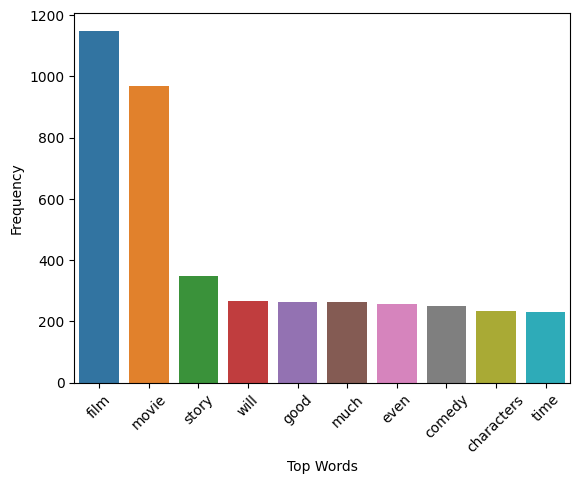

In [37]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10),
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


# Lets talk about the str.join() method

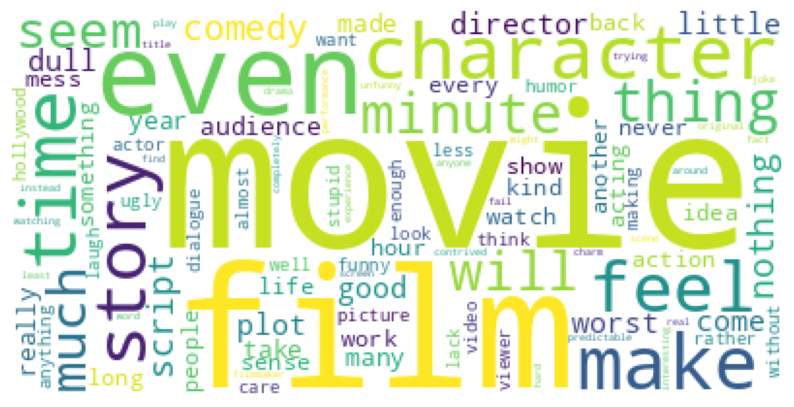

In [38]:
def wc(data,bgcolor="white"): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100,
                 min_word_length=4, contour_width=3,
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")

wc(np.sum(reviews[reviews["Sentiment"]==0]["Phrase"]))
#plot the word cloud for sentiment 0

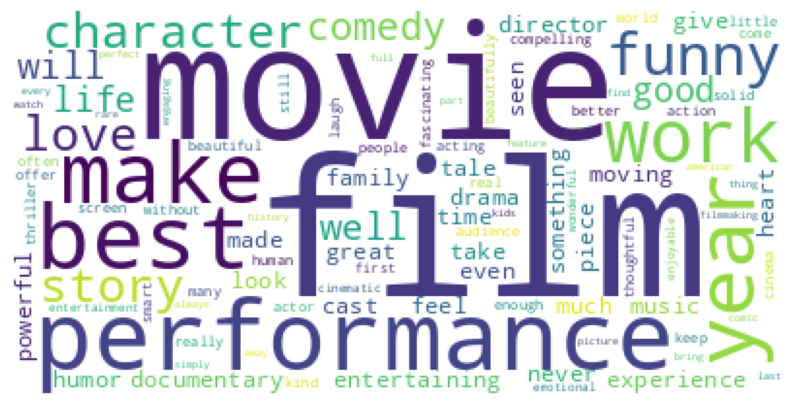

In [39]:
wc(np.sum(reviews[reviews["Sentiment"]==4]["Phrase"]))

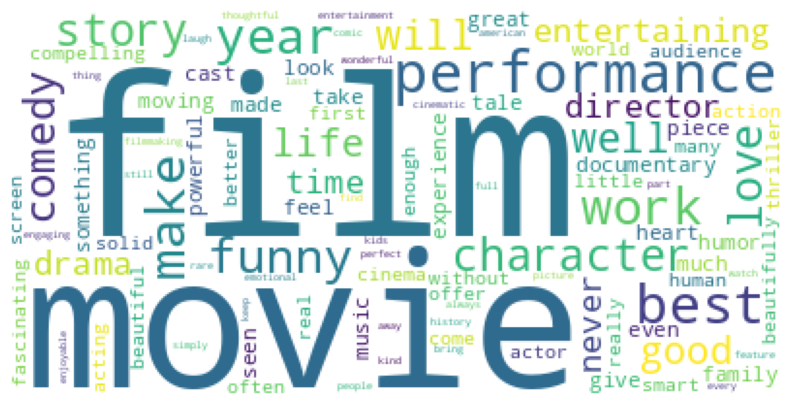

In [40]:
wc(reviews[reviews.Sentiment==4.0].Phrase.sum(), 'white')

#plot the word cloud for sentiment 4

# last step: sentiment analysis

In [41]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [43]:
sid_obj = SentimentIntensityAnalyzer()
sid_obj.polarity_scores("series escapades demonstrating adage good goose good "
"gander occasionally amuses none amounts much story")


{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [44]:
[reviews.loc[3, "Phrase"]]

[['even',
  'fans',
  'ismail',
  'merchant',
  'work',
  'suspect',
  'hard',
  'time',
  'sitting']]

In [45]:
sid_obj = SentimentIntensityAnalyzer()
sentiment_dict = sid_obj.polarity_scores(' '.join(reviews.Phrase[3]))
print(sentiment_dict['compound'])



-0.3818


In [46]:
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


In [47]:
# calculate the sentiment for each review
# group the review by the Sentiment column value from the dataset
# plot on the x axis the Sentiment column [0, 1, 2, 3, 4]
# plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
# include the errorbar on the measured sentiment (use plt.errorbar to do this)
# hint: you may want to use a list comprehension to do this!

In [48]:
[sentiment_vader(reviews.loc[i, "Phrase"]) for i in reviews.index]

[0.8024,
 0.5859,
 -0.3818,
 -0.886,
 -0.128,
 -0.34,
 -0.6369,
 0.7783,
 -0.0516,
 -0.5719,
 -0.1513,
 0.5719,
 0.0,
 0.3182,
 0.0772,
 0.9022,
 0.7269,
 0.8369,
 0.0,
 0.0,
 0.6369,
 0.0,
 0.4019,
 0.4404,
 0.6369,
 0.0,
 0.4019,
 0.9007,
 0.0,
 0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 -0.5574,
 0.7867,
 -0.7351,
 0.0,
 0.4404,
 -0.1027,
 -0.3818,
 -0.7717,
 0.0,
 0.0,
 -0.5279,
 0.34,
 0.4019,
 0.34,
 0.4019,
 0.5719,
 0.5106,
 0.4215,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.6808,
 0.1779,
 0.3182,
 -0.5267,
 0.0,
 -0.5859,
 0.0,
 0.7744,
 -0.836,
 -0.7096,
 0.0,
 0.6369,
 0.0258,
 0.2732,
 0.6486,
 0.0,
 0.0,
 0.25,
 0.0,
 -0.7264,
 -0.128,
 0.5423,
 0.4767,
 0.8591,
 0.3182,
 0.1531,
 -0.5719,
 0.6597,
 0.0,
 0.8643,
 0.5719,
 0.0,
 -0.3818,
 -0.5994,
 0.4939,
 0.6486,
 0.0,
 0.2516,
 0.4767,
 0.4404,
 0.6249,
 0.4927,
 0.0,
 0.5423,
 0.4215,
 -0.8555,
 0.0,
 0.0258,
 0.3612,
 0.3818,
 0.296,
 0.5106,
 0.5767,
 0.5423,
 0.7096,
 -0.7096,
 0.1779,
 0.4019,
 0.0,
 0.743,
 0.0,
 0.2718,
 -0.6

In [49]:
#list comprehension
y = [sentiment_vader(reviews.Phrase[i]) for i in reviews.index]
y

[0.8024,
 0.5859,
 -0.3818,
 -0.886,
 -0.128,
 -0.34,
 -0.6369,
 0.7783,
 -0.0516,
 -0.5719,
 -0.1513,
 0.5719,
 0.0,
 0.3182,
 0.0772,
 0.9022,
 0.7269,
 0.8369,
 0.0,
 0.0,
 0.6369,
 0.0,
 0.4019,
 0.4404,
 0.6369,
 0.0,
 0.4019,
 0.9007,
 0.0,
 0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 -0.5574,
 0.7867,
 -0.7351,
 0.0,
 0.4404,
 -0.1027,
 -0.3818,
 -0.7717,
 0.0,
 0.0,
 -0.5279,
 0.34,
 0.4019,
 0.34,
 0.4019,
 0.5719,
 0.5106,
 0.4215,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.6808,
 0.1779,
 0.3182,
 -0.5267,
 0.0,
 -0.5859,
 0.0,
 0.7744,
 -0.836,
 -0.7096,
 0.0,
 0.6369,
 0.0258,
 0.2732,
 0.6486,
 0.0,
 0.0,
 0.25,
 0.0,
 -0.7264,
 -0.128,
 0.5423,
 0.4767,
 0.8591,
 0.3182,
 0.1531,
 -0.5719,
 0.6597,
 0.0,
 0.8643,
 0.5719,
 0.0,
 -0.3818,
 -0.5994,
 0.4939,
 0.6486,
 0.0,
 0.2516,
 0.4767,
 0.4404,
 0.6249,
 0.4927,
 0.0,
 0.5423,
 0.4215,
 -0.8555,
 0.0,
 0.0258,
 0.3612,
 0.3818,
 0.296,
 0.5106,
 0.5767,
 0.5423,
 0.7096,
 -0.7096,
 0.1779,
 0.4019,
 0.0,
 0.743,
 0.0,
 0.2718,
 -0.6

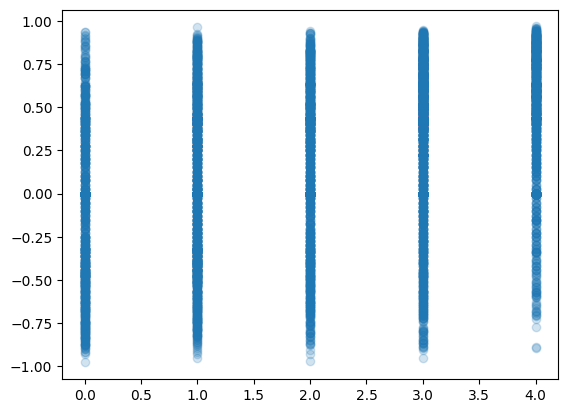

In [50]:
plt.plot(reviews["Sentiment"], y, 'o', alpha=0.2)

Text(0, 0.5, 'Prediction')

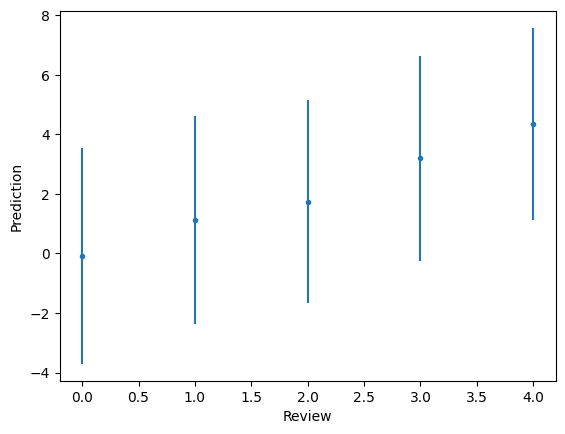

In [51]:

y_arr = (np.array(y) / 0.3 + 0.3 )* 2.5
plt.errorbar(range(5),
             [y_arr[reviews.Sentiment == i].mean() for i in range(5)],
             yerr = [y_arr[reviews.Sentiment == i].std() for i in range(5)],
             fmt='.')
plt.xlabel("Review")
plt.ylabel("Prediction")


In [52]:
y_arr = np.array(y)

In [53]:
y_arr[reviews.Sentiment == 0].mean() , y_arr[reviews.Sentiment == 3].mean()

(-0.1011803171641791, 0.2938376130978027)

In [54]:
(y_arr[reviews.Sentiment == 0].mean() + 1) * 2
(y_arr[reviews.Sentiment == 3].mean() + 1) * 2

2.5876752261956053

In [55]:
y_arr = (y_arr + 1) * 2

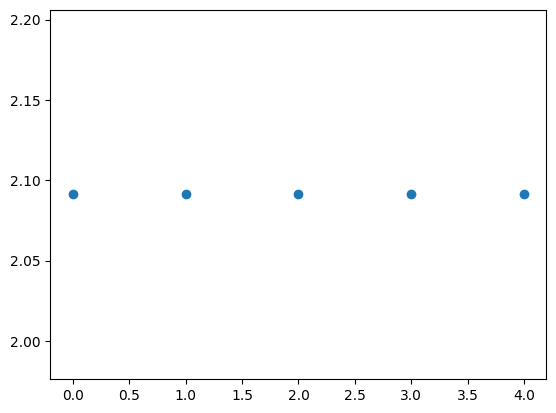

In [56]:
plt.scatter(range(5),
            [y_arr[reviews.Sentiment == 1].mean() for i in range(5)])

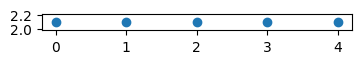

In [57]:
ax = plt.figure(figsize=(4,4)).add_subplot()
plt.scatter(range(5),
            [y_arr[reviews.Sentiment == 1].mean() for i in range(5)])
ax.set_aspect('equal')

Text(0, 0.5, 'sentiment prediction')

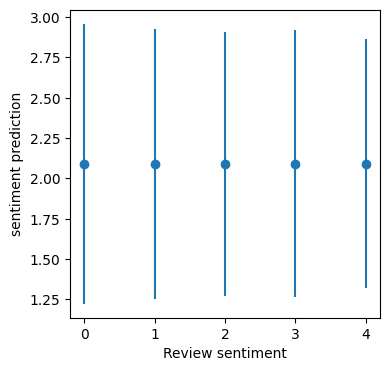

In [58]:
ax = plt.figure(figsize=(4,4)).add_subplot()
plt.errorbar(range(5),
            [y_arr[reviews.Sentiment == 1].mean() for i in range(5)],
             yerr = [y_arr[reviews.Sentiment == i].std() for i in range(5)],
             fmt = 'o')

plt.xlabel("Review sentiment")
plt.ylabel("sentiment prediction")